<a href="https://colab.research.google.com/github/Priyanshi2205/Online-Food-Ordering-Prediction/blob/main/Online_Food_Order_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Online Food Order Prediction

*Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
sns.set_theme(style="whitegrid")

*Uploading Dataset*

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Placement prep/onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


#Exploratory Data Analysis

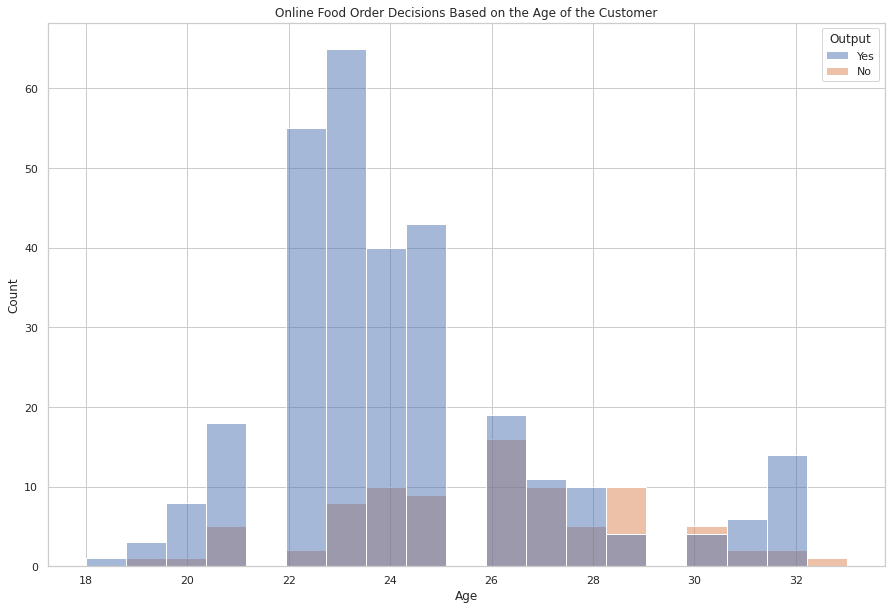

In [5]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
sns.histplot(x="Age", hue="Output", data=df)
plt.show()

By seeing this graph we can observe that most of the orders arfe placed byt the age group of 20-25. This means that this age group is the main target for online food delivery companies.

Creating a dataset of people who orders again

In [6]:
buying_again_data = df.query("Output == 'Yes'")
buying_again_data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


Now we need to analyze about the gender column.

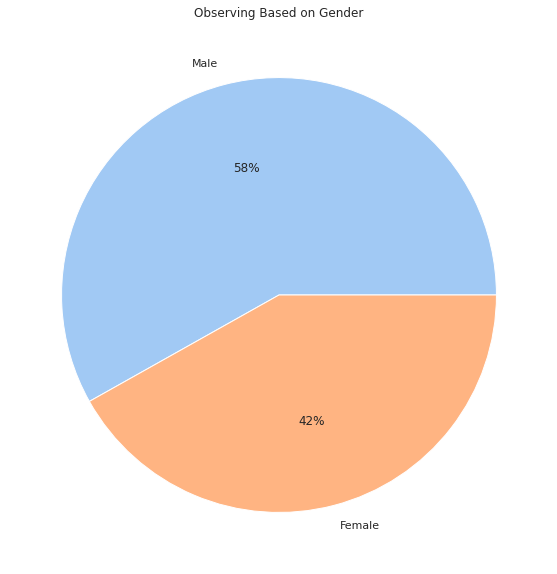

In [7]:
gender = buying_again_data["Gender"].value_counts()
data = gender.values
label = gender.index

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 10))
plt.title("Observing Based on Gender")
#create pie chart
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

Here We can observe that Male Customers order often.

So till now we have are main target customers as Male between a age group of 20-25

Now A nalyze their maritial status as we need to know that they order for individual or for family.

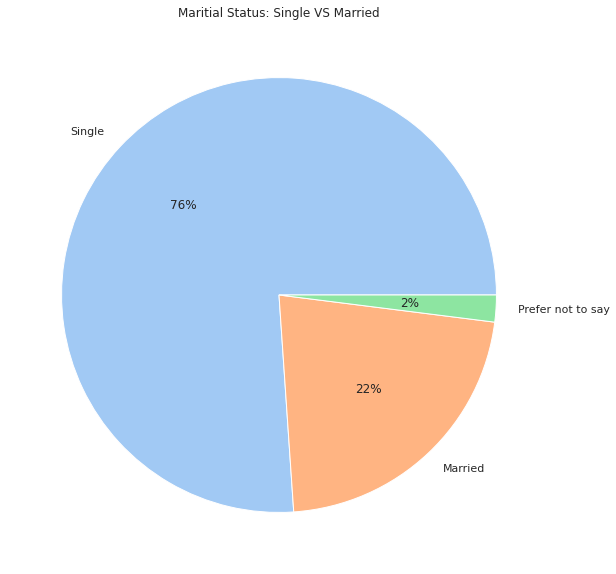

In [8]:
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
data = marital.values

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 10))
plt.title("Maritial Status: Single VS Married")
#create pie chart
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

Here 76% of the customers are single. So as of now are main target are Customers who all are single.

As we observed that are main target customers are single so we do not need o analyze about there family size.


Now we analze about there monthly income.

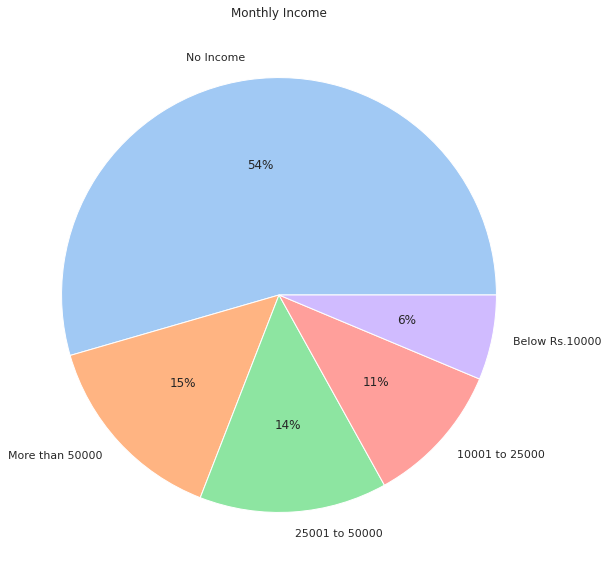

In [9]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
data = income.values

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 10))
plt.title("Monthly Income")

#create pie chart
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

More than 50% of the customers fall under no income group. These can be mostly Students or Housewives

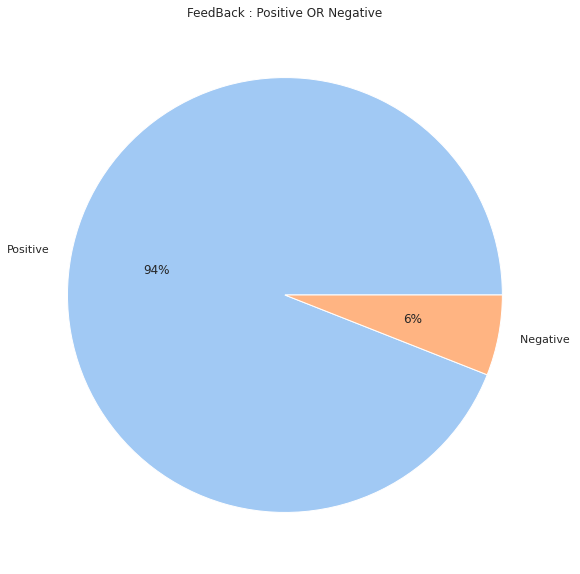

In [10]:
feedback = buying_again_data["Feedback"].value_counts()
label = feedback.index
data = feedback.values

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 10))
plt.title("FeedBack : Positive OR Negative")

#create pie chart
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

Now we need to prepare the data for the training of the model. We will convert the categorical data into numerical Data.

#Categorical Data Into Numerical Data


As this is a **Labeled Data** we will convert the label - **Output** into numerical data

In [11]:
cols = ['Gender', 'Marital Status','Output','Monthly Income']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,Student,4,Post Graduate,4,12.9766,77.5993,560001,1,Positive,Yes
1,24,0,2,Student,2,Graduate,3,12.9770,77.5773,560009,1,Positive,Yes
2,22,1,2,Student,2,Post Graduate,3,12.9551,77.6593,560017,1,Negative,Yes
3,22,0,2,Student,4,Graduate,6,12.9473,77.5616,560019,1,Positive,Yes
4,22,1,2,Student,2,Post Graduate,4,12.9850,77.5533,560010,1,Positive,Yes


Here 1 = "Yes"  0 = "No"

Now it's time to build models

#Logistic Regression

**First split the data into trainig set and testing set using train_test_split**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['Age', 'Gender', 'Monthly Income', 'Family size', 'Marital Status']]
y = df['Output']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

259
129
259
129


**Train and fit a logistic regression model on the training set.**

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred1 = logmodel.predict(X_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
y_test

271    0
46     1
167    1
42     1
349    0
      ..
172    1
253    1
383    1
140    0
232    0
Name: Output, Length: 129, dtype: int64

In [20]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.20      0.04      0.06        26
           1       0.80      0.96      0.87       103

    accuracy                           0.78       129
   macro avg       0.50      0.50      0.47       129
weighted avg       0.68      0.78      0.71       129



[[ 1 25]
 [ 4 99]]


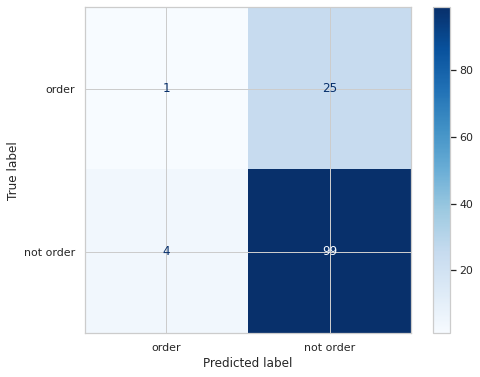

In [21]:
cm = confusion_matrix(y_test,y_pred1)
print(cm)
target_names = ['order','not order']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#Naive Bayes

In [22]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

BernoulliNB()

In [23]:
y_pred2 = BNBmodel.predict(X_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
y_test

271    0
46     1
167    1
42     1
349    0
      ..
172    1
253    1
383    1
140    0
232    0
Name: Output, Length: 129, dtype: int64

In [25]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.50      0.12      0.19        26
           1       0.81      0.97      0.88       103

    accuracy                           0.80       129
   macro avg       0.66      0.54      0.54       129
weighted avg       0.75      0.80      0.74       129



[[  3  23]
 [  3 100]]


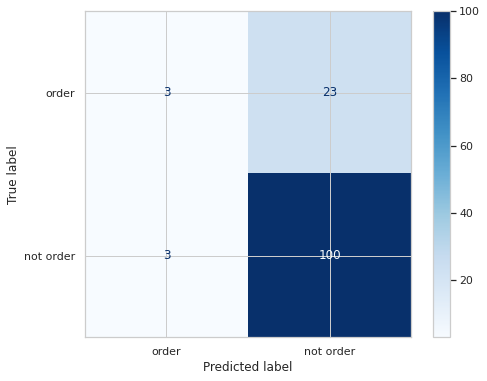

In [26]:
cm = confusion_matrix(y_test,y_pred2)
print(cm)
target_names = ['order','not order']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#SVM

In [27]:
from sklearn.svm import SVC
SVCmodel = SVC()
SVCmodel.fit(X_train, y_train)

SVC()

In [28]:
y_pred3 = SVCmodel.predict(X_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.80      1.00      0.89       103

    accuracy                           0.80       129
   macro avg       0.40      0.50      0.44       129
weighted avg       0.64      0.80      0.71       129



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[  0  26]
 [  0 103]]


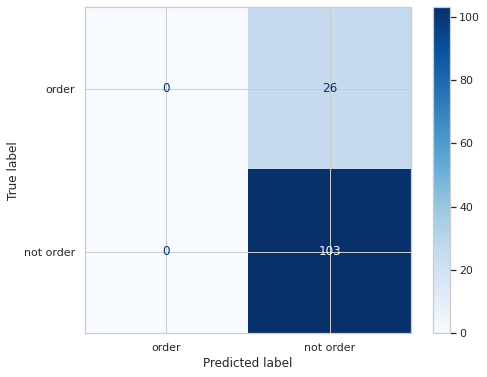

In [30]:
cm = confusion_matrix(y_test,y_pred3)
print(cm)
target_names = ['order','not order']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier()
Rmodel.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred4 = Rmodel.predict(X_test)
y_pred4

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [33]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63        26
           1       0.91      0.89      0.90       103

    accuracy                           0.84       129
   macro avg       0.76      0.77      0.77       129
weighted avg       0.85      0.84      0.85       129



[[17  9]
 [11 92]]


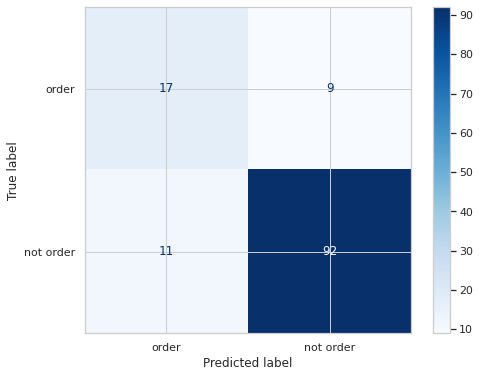

In [34]:
cm = confusion_matrix(y_test,y_pred4)
print(cm)
target_names = ['order','not order']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

#Summary/Conclusion

**Models :** Logistic Regression, SVM, 
Naive Bayes, Random Forest

Upon evaluating all the models we can conclude the following details i.e.


**Accuracy :** If we observe the accuracy of the models used, ***Random 

*   List item
*   List item

Forest*** gives the highest Accuracy.

Random Forest(0.84) > SVM(0.80) > Naive Bayes(0.80) > Logistic Regression(0.78)


**F1-score :** The F1 Scores for class 0 and class 1 are :

**For class 0 :** Random Forest(0.59) > Naive Bayes(0.19) > Logistic Regression(0.06)>SVM(0.00) 

**For class 1 :** Random Forest(0.89) > SVM(0.89) > Naive Bayes(0.88) > Logistic Regression(0.87)

By observing this we can conclude that Random Forest will be the best model for this dataset. 


*Companies dealing with Online Food Ordering can use Random Forest Model for the furthur prediction if the customer will order again or not*